<a href="https://colab.research.google.com/github/Bimalv01/Database-/blob/main/feedbackdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn textblob


In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/feedback_dataset.csv'
feedback_df = pd.read_csv(file_path)

# Display the first few rows and basic info of the dataset
print(feedback_df.info())
print(feedback_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Student ID               1000 non-null   int64 
 1   Teacher ID               1000 non-null   int64 
 2   Course ID                1000 non-null   int64 
 3   Date                     1000 non-null   object
 4   Clarity of Explanations  1000 non-null   int64 
 5   Knowledge of Subject     1000 non-null   int64 
 6   Engagement               1000 non-null   int64 
 7   Punctuality              1000 non-null   int64 
 8   Classroom Management     1000 non-null   int64 
 9   Fairness in Grading      1000 non-null   int64 
 10  Approachability          1000 non-null   int64 
 11  Availability             1000 non-null   int64 
 12  Encouragement            1000 non-null   int64 
 13  Material Relevance       1000 non-null   int64 
 14  Assignment Usefulness    1000 non-null   

In [2]:
# Calculate summary statistics for numerical columns
summary_stats = feedback_df.describe()

# Count occurrences for each rating in categorical columns (1-5 ratings)
ratings_columns = [
    'Clarity of Explanations', 'Knowledge of Subject', 'Engagement', 'Punctuality',
    'Classroom Management', 'Fairness in Grading', 'Approachability', 'Availability',
    'Encouragement', 'Material Relevance', 'Assignment Usefulness', 'Course Pace'
]
rating_counts = feedback_df[ratings_columns].apply(pd.Series.value_counts)

print(summary_stats)
print(rating_counts)


       Student ID   Teacher ID    Course ID  Clarity of Explanations  \
count  1000.00000  1000.000000  1000.000000              1000.000000   
mean    101.42000   105.472000   505.630000                 3.010000   
std      57.34836     2.898209     2.924321                 1.451208   
min       1.00000   101.000000   501.000000                 1.000000   
25%      54.00000   103.000000   503.000000                 2.000000   
50%     102.00000   106.000000   506.000000                 3.000000   
75%     151.00000   108.000000   508.000000                 4.000000   
max     200.00000   110.000000   510.000000                 5.000000   

       Knowledge of Subject  Engagement  Punctuality  Classroom Management  \
count           1000.000000  1000.00000  1000.000000           1000.000000   
mean               3.022000     2.97500     3.002000              3.025000   
std                1.396233     1.39654     1.399984              1.407251   
min                1.000000     1.00000

In [3]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis on textual feedback columns
feedback_df['Positive Feedback Sentiment'] = feedback_df['Positive Feedback'].apply(get_sentiment)
feedback_df['Negative Feedback Sentiment'] = feedback_df['Negative Feedback'].apply(get_sentiment)
feedback_df['Improvement Suggestions Sentiment'] = feedback_df['Improvement Suggestions'].apply(get_sentiment)
feedback_df['Additional Comments Sentiment'] = feedback_df['Additional Comments'].apply(get_sentiment)

# Calculate summary statistics for sentiment columns
sentiment_summary = feedback_df[[
    'Positive Feedback Sentiment', 'Negative Feedback Sentiment',
    'Improvement Suggestions Sentiment', 'Additional Comments Sentiment'
]].describe()

print(sentiment_summary)


       Positive Feedback Sentiment  Negative Feedback Sentiment  \
count                  1000.000000                   1000.00000   
mean                      0.384294                      0.00640   
std                       0.286973                      0.27867   
min                       0.066667                     -0.40000   
25%                       0.200000                     -0.30000   
50%                       0.227273                      0.00000   
75%                       0.600000                      0.10000   
max                       1.000000                      0.60000   

       Improvement Suggestions Sentiment  Additional Comments Sentiment  
count                        1000.000000                    1000.000000  
mean                            0.275425                       0.268090  
std                             0.207674                       0.241895  
min                             0.000000                       0.000000  
25%                       

In [4]:
from collections import Counter
import re

# Function to clean text and get word counts
def get_word_counts(column):
    words = re.findall(r'\b\w+\b', ' '.join(column).lower())
    return Counter(words)

# Get word counts for each feedback column
positive_feedback_word_counts = get_word_counts(feedback_df['Positive Feedback'])
negative_feedback_word_counts = get_word_counts(feedback_df['Negative Feedback'])
improvement_suggestions_word_counts = get_word_counts(feedback_df['Improvement Suggestions'])
additional_comments_word_counts = get_word_counts(feedback_df['Additional Comments'])

# Get the 10 most common words for each feedback column
positive_feedback_top_words = positive_feedback_word_counts.most_common(10)
negative_feedback_top_words = negative_feedback_word_counts.most_common(10)
improvement_suggestions_top_words = improvement_suggestions_word_counts.most_common(10)
additional_comments_top_words = additional_comments_word_counts.most_common(10)

print("Positive Feedback Top Words:", positive_feedback_top_words)
print("Negative Feedback Top Words:", negative_feedback_top_words)
print("Improvement Suggestions Top Words:", improvement_suggestions_top_words)
print("Additional Comments Top Words:", additional_comments_top_words)


Positive Feedback Top Words: [('and', 405), ('very', 312), ('knowledgeable', 213), ('for', 202), ('to', 201), ('learning', 198), ('in', 194), ('well', 192), ('students', 189), ('clear', 120)]
Negative Feedback Top Words: [('to', 389), ('not', 219), ('for', 216), ('the', 216), ('class', 216), ('and', 192), ('rarely', 118), ('available', 118), ('extra', 118), ('help', 118)]
Improvement Suggestions Top Words: [('more', 579), ('could', 509), ('the', 227), ('use', 200), ('teaching', 200), ('should', 184), ('needs', 183), ('to', 183), ('improve', 183), ('sometimes', 124)]
Additional Comments Top Words: [('and', 214), ('teacher', 206), ('a', 198), ('provides', 118), ('helpful', 118), ('feedback', 118), ('on', 118), ('assignments', 118), ('very', 117), ('supportive', 117)]


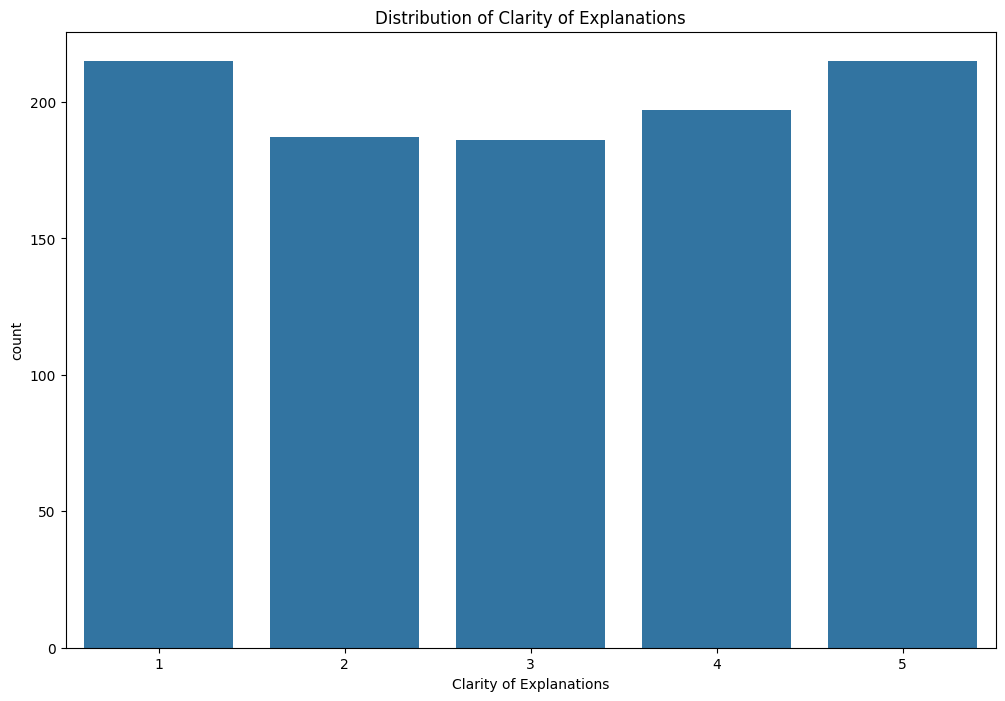

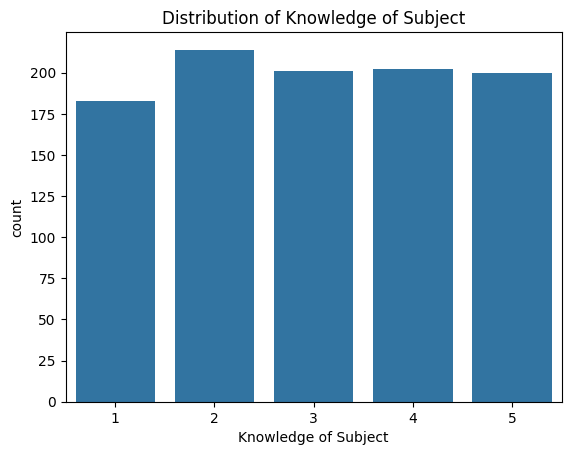

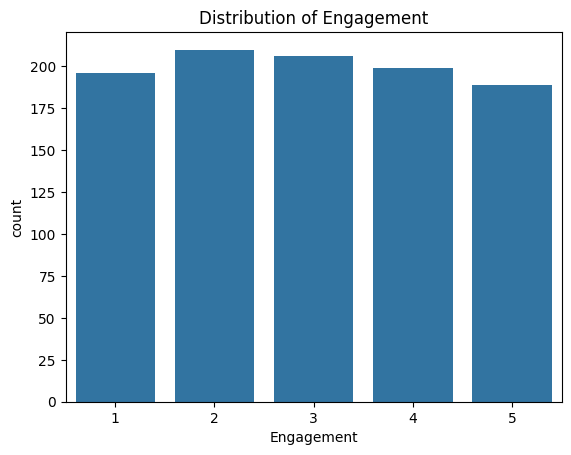

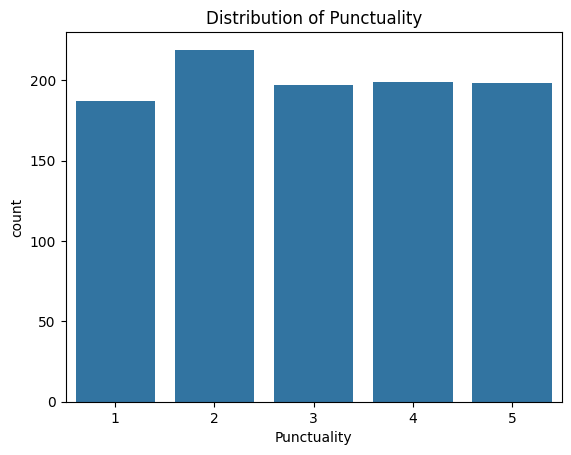

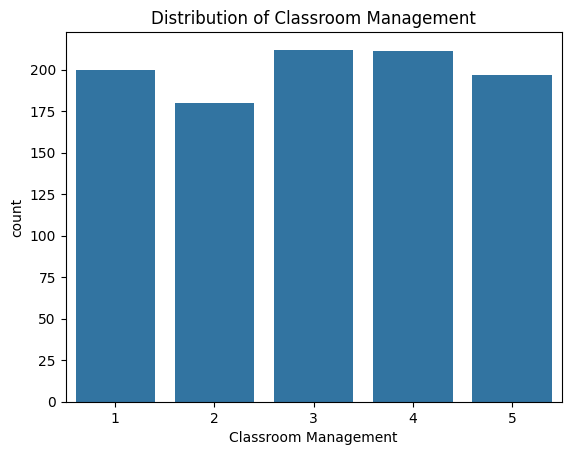

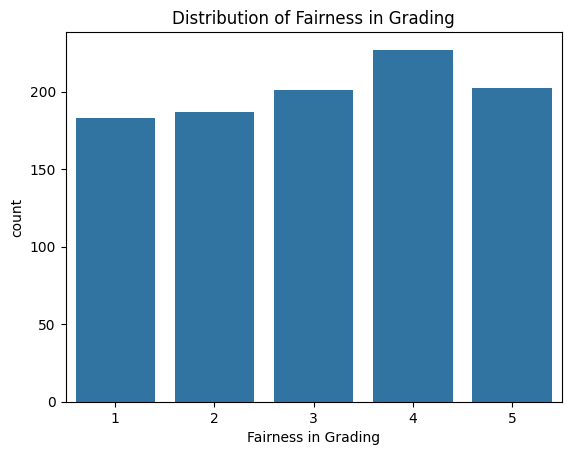

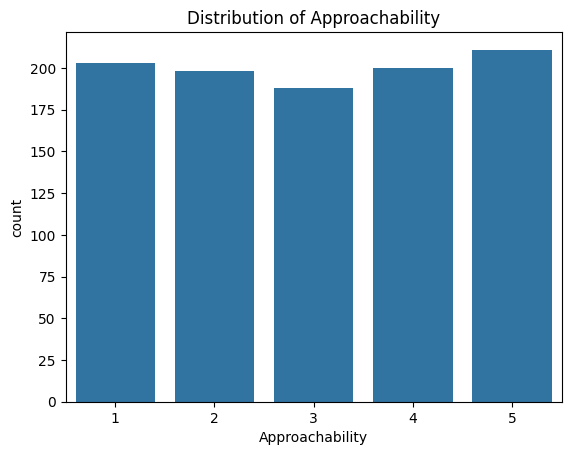

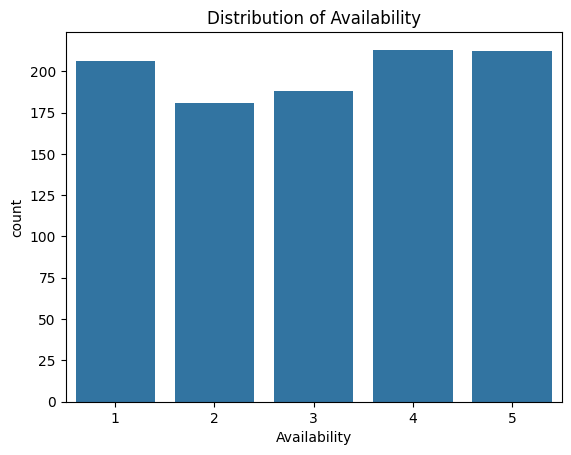

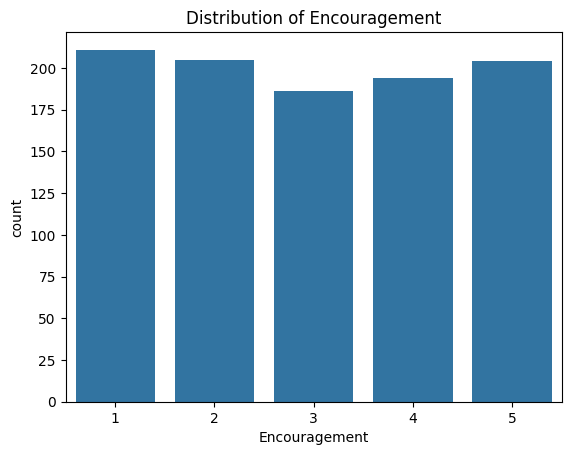

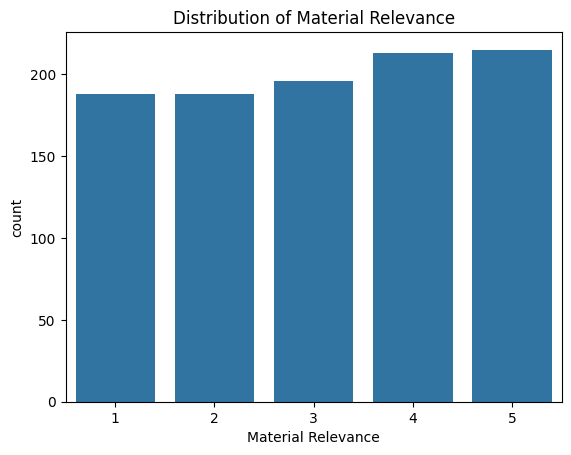

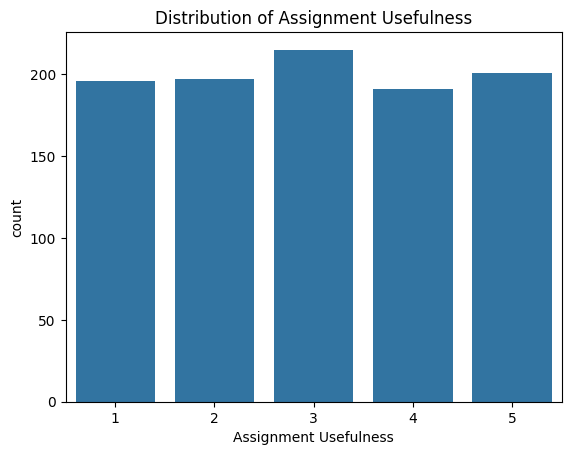

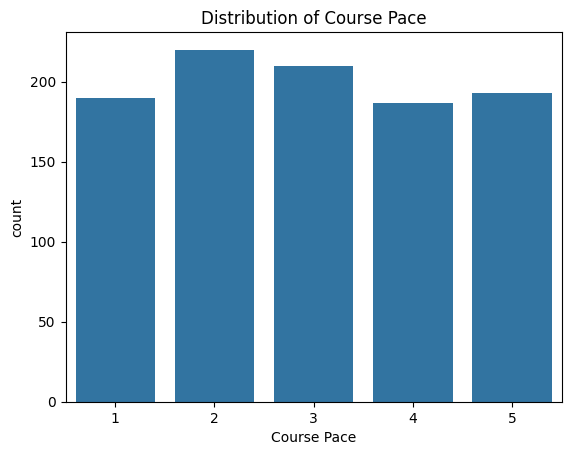

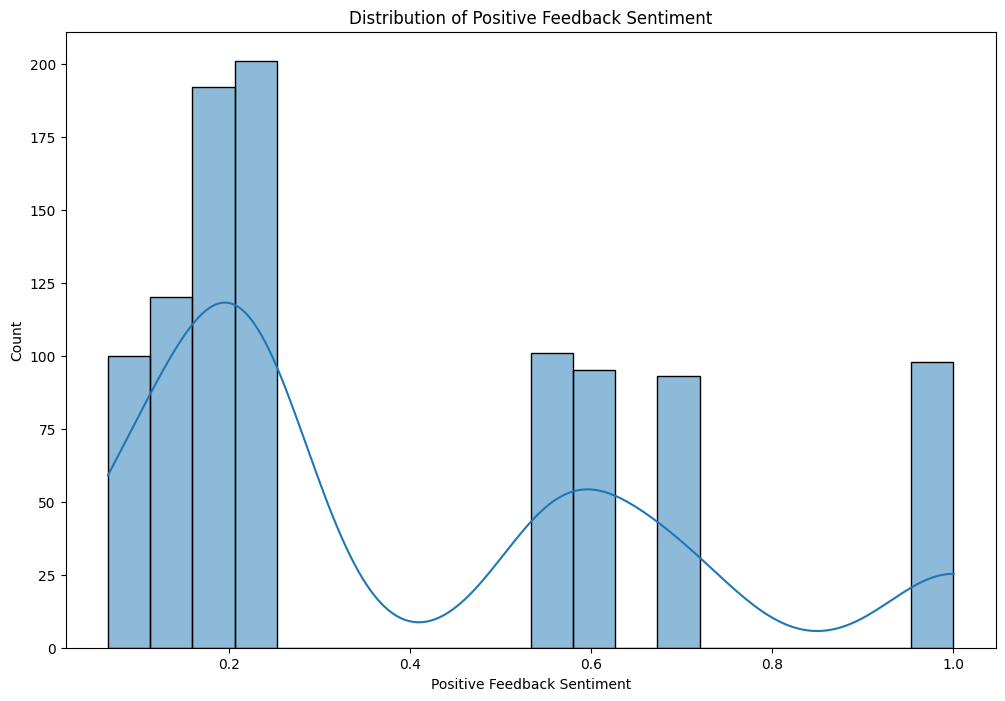

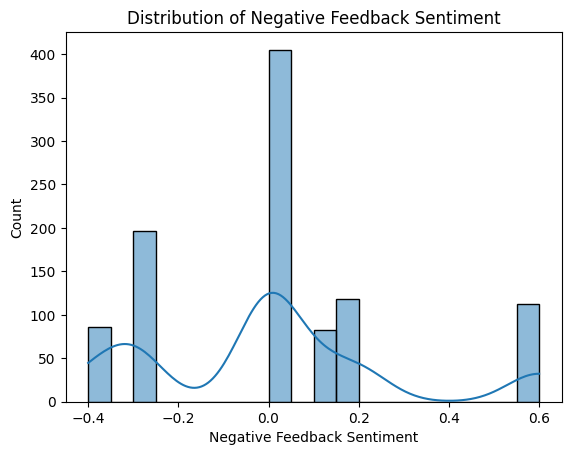

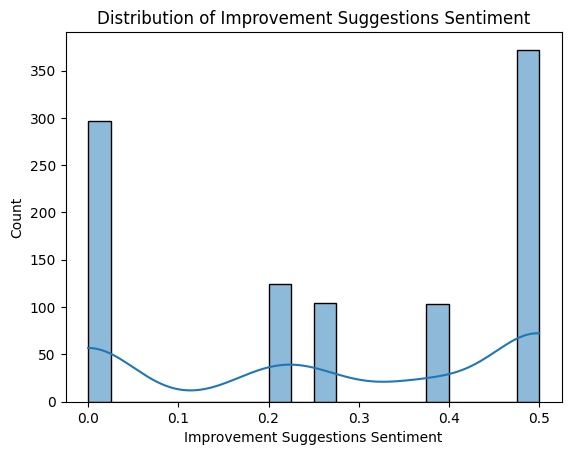

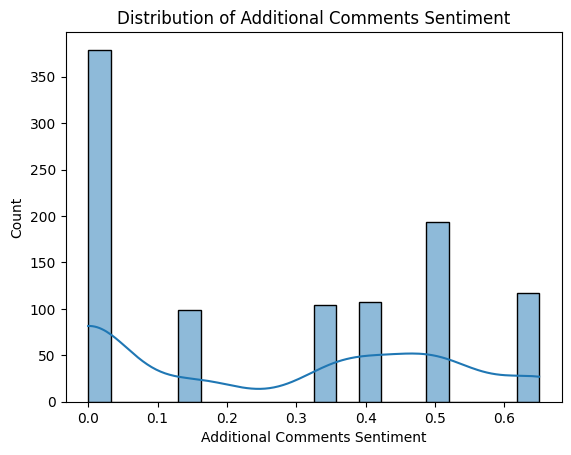

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for rating distributions
plt.figure(figsize=(12, 8))
for column in ratings_columns:
    sns.countplot(data=feedback_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualization for sentiment distributions
sentiment_columns = [
    'Positive Feedback Sentiment', 'Negative Feedback Sentiment',
    'Improvement Suggestions Sentiment', 'Additional Comments Sentiment'
]

plt.figure(figsize=(12, 8))
for column in sentiment_columns:
    sns.histplot(data=feedback_df, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
